In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss

# Load the IMDB dataset with a vocabulary size of 10,000
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Convert the word indices to text
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
reverse_word_index = {v: k for k, v in word_index.items()}
x_train = [" ".join([reverse_word_index.get(i - 3, "<UNK>") for i in s]) for s in x_train]
x_test = [" ".join([reverse_word_index.get(i - 3, "<UNK>") for i in s]) for s in x_test]

# Pre-process the text data using binary bag-of-words (BBOW)
vectorizer = CountVectorizer(binary=True, max_features=vocab_size)
x_train_bbow = vectorizer.fit_transform(x_train)
x_test_bbow = vectorizer.transform(x_test)

# Train a logistic regression model on the binary bag-of-words matrices
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_bbow, y_train)

# Evaluate the logistic regression model on the binary bag-of-words matrices
train_pred = lr.predict(x_train_bbow)
train_loss = log_loss(y_train, train_pred)
train_acc = accuracy_score(y_train, train_pred)

test_pred = lr.predict(x_test_bbow)
test_loss = log_loss(y_test, test_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Train loss: {train_loss}")
print(f"Train accuracy: {train_acc}")
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

1641221/1641221 [==============================] - 0s 0us/step
Train loss: 0.42098987158488854
Train accuracy: 0.98832
Test loss: 5.021601790171802
Test accuracy: 0.86068


In [2]:
y_pred_train = lr.predict(x_train_bbow)
y_pred_test = lr.predict(x_test_bbow)

confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)

print("Confusion matrix (Train):")
print(confusion_matrix_train)
print("Confusion matrix (Test):")
print(confusion_matrix_test)

Confusion matrix (Train):
[[12350   150]
 [  142 12358]]
Confusion matrix (Test):
[[10796  1704]
 [ 1779 10721]]


In [ ]:
review = input("Ingrese una reseña: ")
review_bbow = vectorizer.transform([review])
prediction = lr.predict(review_bbow)

if prediction[0] == 0:
    print("La reseña es negativa.")
else:
    print("La reseña es positiva.")

Ingrese una reseña: gfgfgfgfgfg
La reseña es positiva.


In [ ]:
import pickle

# Guardar el modelo en un archivo pickle
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_archivo = "/content/drive/MyDrive/modelo2/logistic_regression_model.pkl"

In [ ]:
with open(ruta_archivo, "wb") as f:
    pickle.dump(lr, f)

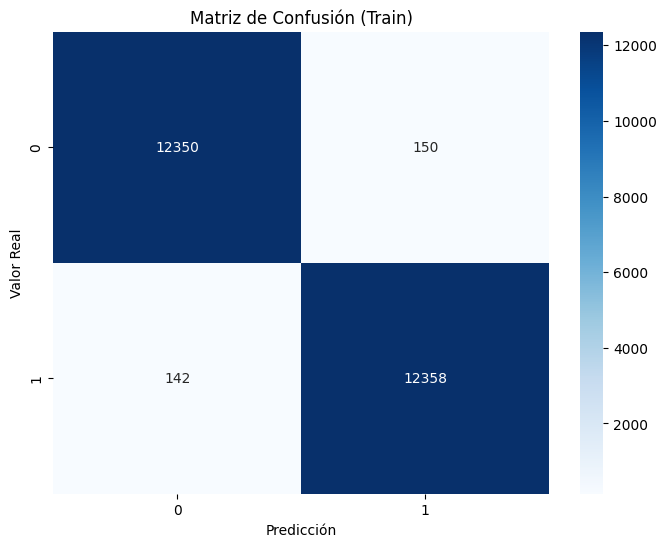

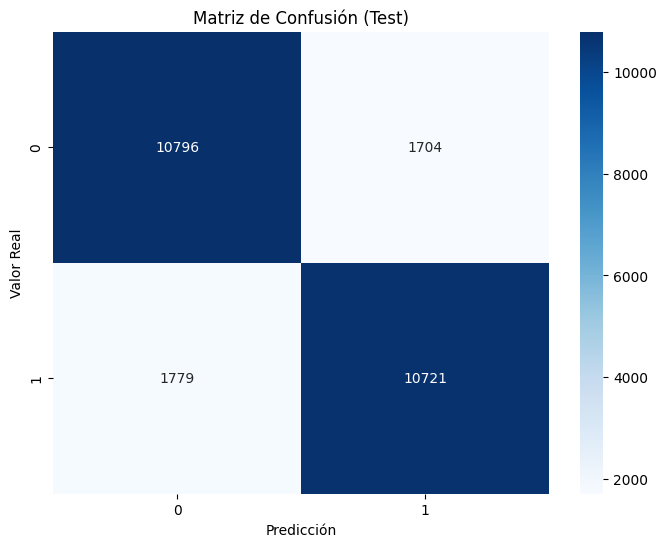

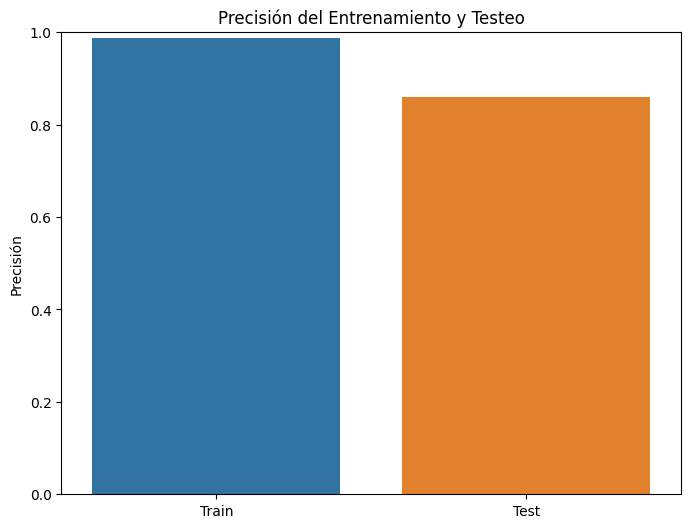

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (Train)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (Test)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()


# Graficar la precisión del entrenamiento y del testeo
labels = ["Train", "Test"]
accuracy = [train_acc, test_acc]

plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracy)
plt.title("Precisión del Entrenamiento y Testeo")
plt.ylabel("Precisión")
plt.ylim(0, 1)
plt.show()